# Exploratory Data Analysis

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re
import sys
import inspect
import numpy as np
import pandas as pd

In [4]:
tweets = pd.read_csv('../data/cleaned_africa_data.csv')
tweets.head()

,created_at,source,full_text,sentiment,polarity,subjectivity,lang,statuses_count,favorite_count,retweet_count,screen_name,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,location
0,2022-08-03 20:19:13+00:00,Twitter for Android,pelosi airplane landed safely taiwan amp playi...,1,0.300000,0.203571,en,888,0,0,DzCritical,318,373,False,Pelosi,,Algérie
1,2022-08-02 15:24:42+00:00,Twitter Web App,watch video beginning chinese bombing taiwan p...,-1,0.000000,0.000000,en,1597,3,0,toopsat,764,144,False,Pelosi,,
2,2022-08-02 15:02:35+00:00,Twitter for Android,pelosi taipei taiwan xijinping china verge ano...,-1,0.000000,0.000000,en,2293,2,0,NassimaLilEmy,64,47,False,Pelosi,,Algérie
3,2022-08-01 13:51:42+00:00,Twitter for Android,hobipalooza laacademiaexpulsion weuro jhopeatl...,1,0.433333,0.733333,en,44,0,0,d_dhayae,60,463,False,HOBIPALOOZA,,Chlef
4,2022-07-31 20:02:20+00:00,Twitter for Android,pelosi china china time httpstcotedjztlszu,-1,0.000000,0.000000,en,1313,2,0,Mohamme65404115,39,206,False,Pelosi,,Algérie


In [5]:
#To get information about the data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6735 entries, 0 to 6734
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6735 non-null   object 
 1   source              6735 non-null   object 
 2   full_text           6735 non-null   object 
 3   sentiment           6735 non-null   int64  
 4   polarity            6735 non-null   float64
 5   subjectivity        6735 non-null   float64
 6   lang                6735 non-null   object 
 7   statuses_count      6735 non-null   int64  
 8   favorite_count      6735 non-null   int64  
 9   retweet_count       6735 non-null   int64  
 10  screen_name         6735 non-null   object 
 11  followers_count     6735 non-null   int64  
 12  friends_count       6735 non-null   int64  
 13  possibly_sensitive  6735 non-null   bool   
 14  hashtags            6735 non-null   object 
 15  user_mentions       6735 non-null   object 
 16  locati

In [6]:
tweets.shape

(6735, 17)

In [7]:
# print("The number of missing value(s) based on columns:\n{}".format(tweets.isnull().sum()))
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columns having missing value(s):{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s): 0
Columns having missing value(s):Index([], dtype='object')


In [8]:
# Form a new data frame (named cleanTweet), containing columns  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲 .
clean_tweet = pd.DataFrame(columns=['full_text','polarity'])
clean_tweet['full_text'] =  tweets['full_text'].to_list()
clean_tweet['polarity'] =  tweets['polarity'].to_list()

In [9]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [10]:
clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6735 entries, 0 to 6734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   full_text  6735 non-null   object 
 1   polarity   6735 non-null   float64
dtypes: float64(1), object(1)
memory usage: 105.4+ KB


In [11]:
#  a function text_category that takes a value 'p' and returns, 
# depending on the value of p, a string 'positive', 'negative' or 'neutral'.
def text_category(p:float)->str:
    if(p > 0):
        return "positive"
    elif(p < 0):
        return "negative"
    else:
        return "neutral"

In [14]:
clean_tweet['score'] = clean_tweet['polarity'].apply(text_category)
clean_tweet.head(10)

,full_text,polarity,score
0,pelosi airplane landed safely taiwan amp playi...,0.300000,positive
1,watch video beginning chinese bombing taiwan p...,0.000000,neutral
2,pelosi taipei taiwan xijinping china verge ano...,0.000000,neutral
3,hobipalooza laacademiaexpulsion weuro jhopeatl...,0.433333,positive
4,pelosi china china time httpstcotedjztlszu,0.000000,neutral
5,v intro logo animation blue smoke looking prof...,0.169841,positive
6,twinning afro space senorita countdown days go...,0.000000,neutral
7,youre missing shes far taiwan couplegoals http...,-0.050000,negative
8,chinas mortgage crisis banks failing protests ...,0.000000,neutral
9,twitter make laugh scared pelosi taiwan visit,0.300000,positive


<AxesSubplot:>

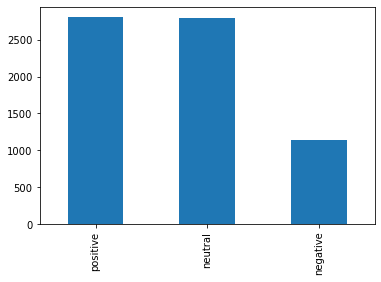

In [15]:
# ploting score using bar presentation
clean_tweet['score'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='score'>

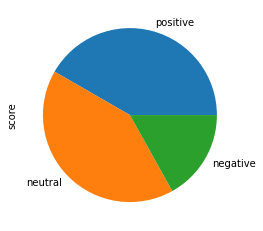

In [16]:
# ploting score using pie chart presentation
clean_tweet['score'].value_counts().plot(kind='pie')

In [17]:
# Remove rows from cleanTweet where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲=0  
# (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral) and reset the frame index.
clean_tweet.drop(clean_tweet[clean_tweet['score']=="neutral"].index, inplace=True)
clean_tweet.reset_index(drop=True, inplace=True)
clean_tweet.head()

,full_text,polarity,score
0,pelosi airplane landed safely taiwan amp playi...,0.300000,positive
1,hobipalooza laacademiaexpulsion weuro jhopeatl...,0.433333,positive
2,v intro logo animation blue smoke looking prof...,0.169841,positive
3,youre missing shes far taiwan couplegoals http...,-0.050000,negative
4,twitter make laugh scared pelosi taiwan visit,0.300000,positive


In [18]:
# Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping 
# {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column
def scoremap_category(score:str)->int:
    if(score == "positive"):
        return 1
    else:
        return 0

In [19]:
clean_tweet['scoremap'] = clean_tweet['score'].apply(scoremap_category)
clean_tweet.head()

,full_text,polarity,score,scoremap
0,pelosi airplane landed safely taiwan amp playi...,0.300000,positive,1
1,hobipalooza laacademiaexpulsion weuro jhopeatl...,0.433333,positive,1
2,v intro logo animation blue smoke looking prof...,0.169841,positive,1
3,youre missing shes far taiwan couplegoals http...,-0.050000,negative,0
4,twitter make laugh scared pelosi taiwan visit,0.300000,positive,1


<AxesSubplot:>

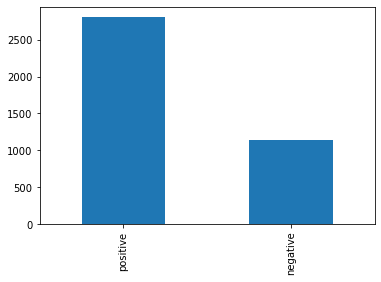

In [20]:
clean_tweet['score'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='score'>

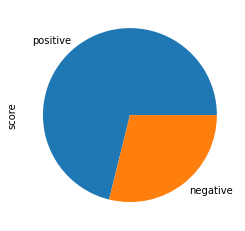

In [21]:
clean_tweet['score'].value_counts().plot(kind='pie')